## Notes 

Some ideas taken from [here](http://people.virginia.edu/~lz2n/mse6020/notes/D-partial-fcc.pdf) and from [here](http://www.slideshare.net/omaratefradwan/mse501-ch5-radwan).

Burgers vector of the lowest energy dislocation is 
$$
    b = \frac{a}{2} \langle 110 \rangle \qquad \Rightarrow\qquad  |b| = \frac{a}{\sqrt{2}}
$$
The next best option is 
$$
    b' = a \langle 001 \rangle \qquad \Rightarrow \qquad |b'| = a 
$$
(the latter is rarely observed!) 

The slip-plane for $b'$ dislocations are $\{111\}$ close packed planes stacked in ABCABC arrangement. 

But of course we can equivalently take $b \propto 101$ or $b \propto 011$. 



In [1]:
using PyPlot
using JuLIP
using JuLIP.ASE, JuLIP.Potentials, JuLIP.Constraints 


`imolecule` is not correctly installed.


In [ ]:
# anisotropic elasticity solution for an FCC edge dislocation
#reload("MaterialsScienceTools")
calc = lennardjones(r0=rnn("Al"))
at, xcore = MaterialsScienceTools.Dislocations_Al_hard_110.fcc_edge_geom("Al", 30.1, truncate=false, cle=:anisotropic, calc = calc,zDir=1)

In [ ]:
# anisotropic elasticity solution for an FCC edge dislocation
reload("MaterialsScienceTools")
ξ(X) = [ξ1(X[1], X[2]), X[2]]
ξ1(x::Float64, y::Float64) = x - angle(x + im * y) / (2*π)
dξ1(x::Float64, y::Float64) = 1 + y / (x^2 + y^2) / (2*π)

function xi_solver(Y::Vector; TOL = 1e-10, maxnit = 5)
    y = Y[2]
    x = y
    for n = 1:maxnit
        f = ξ1(x, y) - Y[1]
        if abs(f) <= TOL; break; end
        x = x - f / dξ1(x, y)
    end
    if abs(ξ1(x, y) - Y[1]) > TOL
        warn("newton solver did not converge; returning input")
        return Y
    end
    return [x, y]
end

for n = 1:10
    Y = 10.0 * [1.0 + rand(), 1.0 + rand()]
    @show typeof(Y)
    X = xi_solver(Y)
    @show norm(ξ(X) - Y)
end

 a : 4.05

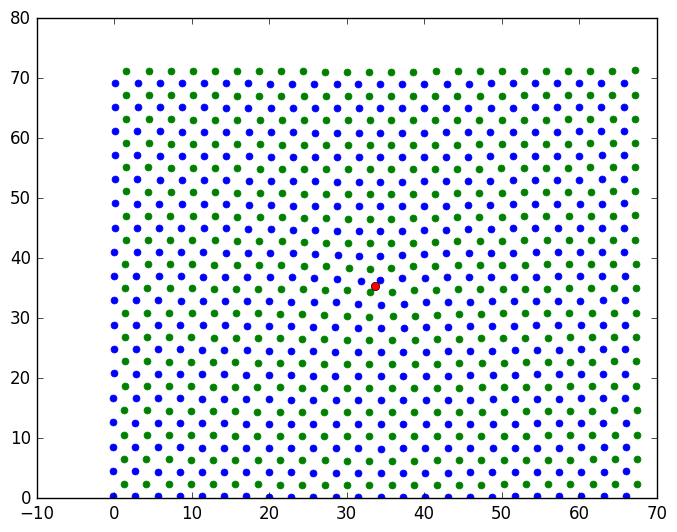

 b: 2.8637824638055176 Cv [6.47872 3.22679 3.22679 2.88462e-11 3.33021e-11 -3.09038e-11; 3.22679 6.47872 3.22679 -1.68211e-10 -5.03046e-11 -5.23938e-11; 3.22679 3.22679 6.47872 -7.42833e-11 -1.35956e-10 -1.09051e-11; 9.64467e-11 -3.69896e-10 -1.83134e-10 4.21237 1.50524e-12 -1.29552e-12; 1.28396e-10 -1.05318e-10 -2.50526e-10 1.51645e-12 4.21237 -2.28327e-13; -3.20653e-11 -7.87515e-11 5.62414e-13 -1.73795e-12 2.85016e-13 4.21237]

3×864 Array{Float64,2}:
 -0.136079  1.29673  -0.130487  1.30317  …  67.1623   65.7263  67.1576 
  0.467355  2.48684   4.53232   6.55319     67.3007   69.3057  71.3366 
  0.0       1.43189   0.0       1.43189      1.43189   0.0      1.43189

In [56]:
# anisotropic elasticity solution for an FCC edge dislocation
reload("MaterialsScienceTools")
calc = lennardjones(r0=rnn("Al"))
at, xcore = MaterialsScienceTools.Dislocations_Al_hard_110.fcc_edge_geom("Al", 10.1, truncate=false, cle=:anisotropic, calc = calc,zDir=1)
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
plot(x[I0], y[I0], "b.", markersize=10)
plot(x[I1], y[I1], "g.", markersize=10)
plot([xcore[1]], [xcore[2]], "ro")
X = positions(at) |> mat

 a : 4.05

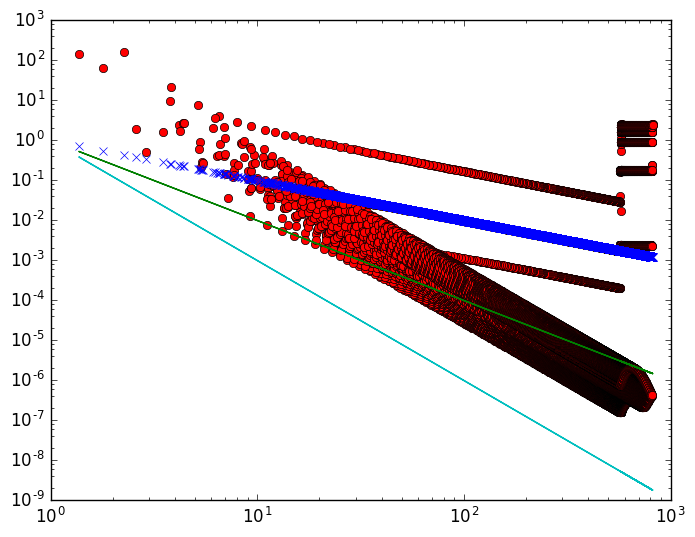

 b: 2.8637824638055176 Cv [6.47872 3.22679 3.22679 2.88462e-11 3.33021e-11 -3.09038e-11; 3.22679 6.47872 3.22679 -1.68211e-10 -5.03046e-11 -5.23938e-11; 3.22679 3.22679 6.47872 -7.42833e-11 -1.35956e-10 -1.09051e-11; 9.64467e-11 -3.69896e-10 -1.83134e-10 4.21237 1.50524e-12 -1.29552e-12; 1.28396e-10 -1.05318e-10 -2.50526e-10 1.51645e-12 4.21237 -2.28327e-13; -3.20653e-11 -7.87515e-11 5.62414e-13 -1.73795e-12 2.85016e-13 4.21237]

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0c5a056350>

In [21]:
## isotropic elasticity solution for an FCC edge dislocation 
reload("MaterialsScienceTools")
calc = lennardjones(r0=rnn("Al"))
at, xcore = MaterialsScienceTools.Dislocations_Al_hard_110.fcc_edge_geom("Al", 200.1, truncate=false, cle=:anisotropic, calc = calc)
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
#plot(x[I0], y[I0], "b.", markersize=10)
#plot(x[I1], y[I1], "g.", markersize=10)
#plot([xcore[1]], [xcore[2]], "ro")
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
set_calculator!(at, calc)
xcore = [xcore[1],xcore[2],0] #append a zero to xcore
F = forces(at)
X = positions(at)
r = [norm(x-xcore) for x in X]
f = [norm(g) for g in F]
y = r.^(-2)  #plot line of slope two
z = r.^(-1)  #plot line of slope one
w = r.^(-3)  #plot line of slope three
loglog(r,f, "ro")
loglog(r,y, "g-")
loglog(r,z, "bx")
loglog(r,w, "c-")

In [ ]:
## isotropic elasticity solution for an FCC edge dislocation 
reload("MaterialsScienceTools")
calc = lennardjones(r0=rnn("Al"))
at, xcore = MaterialsScienceTools.Dislocations_Al_hard_110.fcc_edge_geom("Al", 10.1, truncate=false, cle=:anisotropic, calc = calc)
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
#plot(x[I0], y[I0], "b.", markersize=10)
#plot(x[I1], y[I1], "g.", markersize=10)
#plot([xcore[1]], [xcore[2]], "ro")
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
set_calculator!(at, calc)
xcore = [xcore[1],xcore[2],0] #append a zero to xcore
F = forces(at)
X = positions(at)
r = [norm(x-xcore) for x in X]
f = [norm(g) for g in F]
y = r.^(-2)  #plot line of slope two
z = r.^(-1)  #plot line of slope one
w = r.^(-3)  #plot line of slope three
loglog(r,f, "ro")
loglog(r,y, "g-")
#loglog(r,z, "bx")
loglog(r,w, "c-")

[0.0,0.0,0.0]

[9.06513 3.22679 0.640383 5.09541e-12 2.31394e-11 9.04038e-12; 3.22679 6.47872 3.22679 -2.50376e-11 1.85895e-11 1.95123e-11; 0.640383 3.22679 9.06513 9.85372e-12 1.6125e-11 4.03481e-12; 2.35332e-11 1.62144e-11 3.39497e-11 4.21237 3.6741e-11 -1.52075e-11; 1.3955e-11 1.9744e-11 1.37901e-11 2.49922e-11 1.62596 3.19824e-11; 1.82787e-11 5.05893e-11 1.67756e-11 3.24701e-12 2.4988e-11 4.21237](λ,ϕ) = 

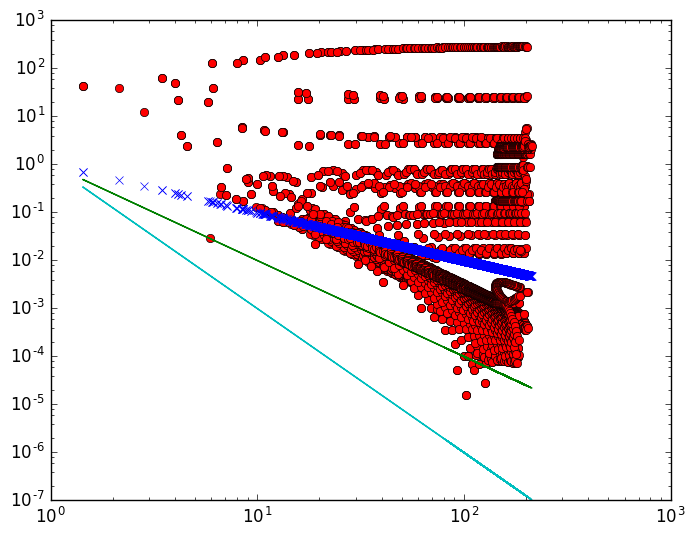

(1.0876050097921104,0.952133921711523)


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f191cfbf750>

In [8]:
# isotropic elasticity solution for an FCC edge dislocation 
reload("MaterialsScienceTools")
calc = lennardjones(r0=rnn("Al"))
at, xcore = MaterialsScienceTools.Dislocations.fcc_edge_geom("Al", 50.1, truncate=false, cle=:anisotropic, calc = calc)
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
#plot(x[I0], y[I0], "b.", markersize=10)
#plot(x[I1], y[I1], "g.", markersize=10)
#plot([xcore[1]], [xcore[2]], "ro")
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
set_calculator!(at, calc)
xcore = [xcore[1],xcore[2],0] #append a zero to xcore
F = forces(at)
X = positions(at)
r = [norm(x-xcore) for x in X]
f = [norm(g) for g in F]
y = r.^(-2)  #plot line of slope two
z = r.^(-1)  #plot line of slope one
w = r.^(-3)  #plot line of slope three
loglog(r,f, "ro")
loglog(r,y, "g-")
loglog(r,z, "bx")
loglog(r,w, "c-")

In [ ]:
# next we need to check the implementation of the elastic constants 
reload("MaterialsScienceTools")
El = MaterialsScienceTools.Elasticity
Dis = MaterialsScienceTools.Dislocations
;

 a : 4.05

 b: 2.8637824638055176 Cv [6.47872 3.22679 3.22679 2.88462e-11 3.33021e-11 -3.09038e-11; 3.22679 6.47872 3.22679 -1.68211e-10 -5.03046e-11 -5.23938e-11; 3.22679 3.22679 6.47872 -7.42833e-11 -1.35956e-10 -1.09051e-11; 9.64467e-11 -3.69896e-10 -1.83134e-10 4.21237 1.50524e-12 -1.29552e-12; 1.28396e-10 -1.05318e-10 -2.50526e-10 1.51645e-12 4.21237 -2.28327e-13; -3.20653e-11 -7.87515e-11 5.62414e-13 -1.73795e-12 2.85016e-13 4.21237]count : 

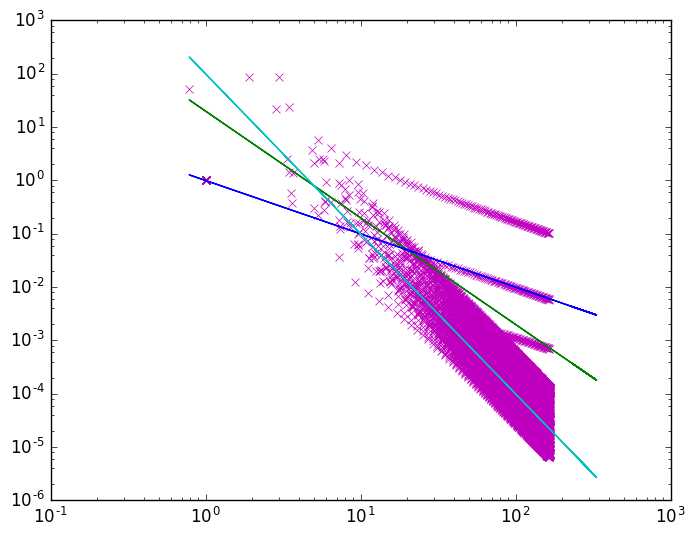

14976

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0c52f20d10>

In [60]:
# anisotropic elasticity solution for an FCC edge dislocation
reload("MaterialsScienceTools")
calc = lennardjones(r0=rnn("Al"))
at, xcore = MaterialsScienceTools.Dislocations_Al_hard_110.fcc_edge_geom("Al", 80.1, truncate=false, cle=:anisotropic, calc = calc,zDir=1,perfect = false)
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
#plot(x[I0], y[I0], "b.", markersize=10)
#plot(x[I1], y[I1], "g.", markersize=10)
#plot([xcore[1]], [xcore[2]], "ro")
X = positions(at) |> mat
xP, yP, zP = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
set_calculator!(at, calc)
xcore = [xcore[1],xcore[2],0] #append a zero to xcore
F = forces(at)
X = positions(at)
r = [norm(x-xcore) for x in X]
f = [norm(g) for g in F]
nu = length(f)
pip = zeros(nu,1)
inner = ones(nu)
inner_force = ones(nu)
count = 1
for i=1:nu
    pip[i,1] = norm([xP[i];yP[i]]-[xcore[1]; xcore[2]])
    #if (-6.00 > yP[i]-xcore[2] || 6.00 < yP[i]-xcore[2] || xP[i] > 0) && norm([xP[i];yP[i]]-[xcore[1]; xcore[2]]) < maximum(r)/2
    if norm([xP[i];yP[i]]-[xcore[1]; xcore[2]]) < maximum(r)/2 
    #print(" here ")
        #print(xP[i]-xcore[1])
        inner[count] =r[i]
        inner_force[count]= norm(F[i])#f[i]
        #print(" force :")
        #print(F[i])
        count = count +1
    end
end
print("count : ")
print(count)
ITEST = find(log(pip[:,1]) .> 1.0)
v = x[ITEST]
u = y[ITEST]
fTest = [norm(F[i]) for i in ITEST]
#plot(x[ITEST], y[ITEST], "b.", markersize=10)
y = 20r.^(-2)  #plot line of slope two
z = r.^(-1)  #plot line of slope one
w = 100r.^(-3)  #plot line of slope three
#loglog(pip,f, "mx")
loglog(inner,inner_force, "mx")
#loglog(r,f, "ro")
loglog(r,y, "g-")
loglog(r,z, "b-")
loglog(r,w, "c-")

In [ ]:
# first try the standard cubic cell : 
# this looks like a valid cubic symmetry tensor ✓
atu = set_pbc!(bulk("Al", cubic=true) * 2, true)
set_calculator!(atu, lennardjones(r0=rnn("Al")))
set_constraint!(atu, VariableCell(atu))
# JuLIP.Solve.minimise!(atu);
Cvoigt = round(El.voigt_moduli(atu), 3)
Cvoigt

In [ ]:
reload("MaterialsScienceTools")
at, xcore = MaterialsScienceTools.Dislocations.fcc_edge_geom("Al", 100.1, truncate=false, cle=:isotropic, ν=0.25)
X = positions(at) |> mat
print(xcore)
set_calculator!(at, lennardjones(r0=rnn("Al")))
xcore = [xcore[1],xcore[2],0]
F = forces(at)
X = positions(at)
r = [norm(x-xcore) for x in X]
f = [norm(g) for g in F]
y = r.^(-2)
z = r.^(-1)
print(log(y[1]))
#z = r[5:22]
#w = f[5:22]
#(log(w[5])-log(w[1]))/(log(z[5])-log(z[1]))
loglog(r,f, "ro")
loglog(r,y, "g-")

In [ ]:
# check how far we are from anisotropy: pretty far actually 
println((Cvoigt[1,1] - Cvoigt[1,2]) / 2)
println("for isotropy, this number should match Cvoigt[6,6] = ", Cvoigt[6,6])

In [ ]:
reload("MaterialsScienceTools")
Dis = MaterialsScienceTools.Dislocations
calc = lennardjones(r0=rnn("Al"))
at, xcore = Dis.fcc_edge_geom("Al", 5.1, truncate=false, cle=:anisotropic, calc=calc, TOL=1e-4)
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
plot(x[I0], y[I0], "b.", markersize=10)
plot(x[I1], y[I1], "g.", markersize=10)
plot([xcore[1]], [xcore[2]], "ro")

In [ ]:
reload("MaterialsScienceTools")
Cv = copy(Cvoigt)
Cv[2,2] = Cv[3,3] = Cv[1,1]
Cv[1,3] = Cv[2,3] = Cv[1,2]
Cv[4,4] = Cv[5,5] = Cv[6,6] = (Cv[1,1] - Cv[1,2])/2

In [ ]:
MaterialsScienceTools.Dislocations.u_edge([], [], 1.0, Cv)

In [ ]:
pi/2

In [ ]:
vivo = ones(5)